In [64]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [65]:
# Loading Iris dataset
iris = load_iris()
print("Dataset:\n",iris)

Dataset:
 {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0

In [66]:
# Rows and Columns
rows,cols=iris.data.shape
print("Rows :",rows)
print("Columns :",cols)
print("Columns Names :",iris.feature_names)

Rows : 150
Columns : 4
Columns Names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [67]:
# Splitting X and Y
X = iris.data
Y= iris.target 

In [68]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [69]:
# Apply KMeans clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [70]:
# ARI Score
ari_score = adjusted_rand_score(Y, kmeans.labels_)
# Print ARI score
print(f"Adjusted Rand Index (ARI): {ari_score}")

Adjusted Rand Index (ARI): 0.7163421126838476


In [71]:
# Inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 78.85566582597731


In [73]:
# Labels and Clusters
labels = kmeans.labels_
centroids = pca.transform(kmeans.cluster_centers_)

print("Labels :\n",labels)
print("Centroids :\n",centroids )

Labels :
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Centroids :
 [[ 2.34652659  0.27393856]
 [-2.64241546  0.19088505]
 [ 0.66567601 -0.3316042 ]]


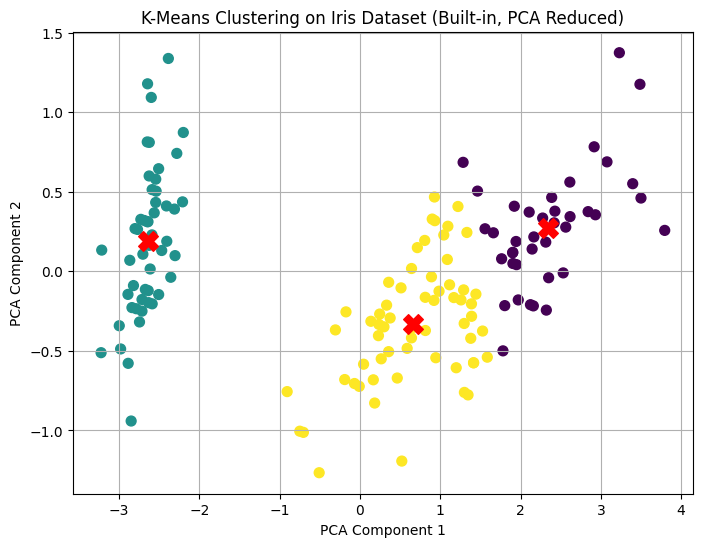

In [74]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title('K-Means Clustering on Iris Dataset (Built-in, PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [75]:
# Predictions

# new_sample = np.array([[150,400,100,300]])              # Cluster=0
# new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])          # Cluster=1
new_sample = np.array([[6.4, 2.4, 5.0, 1.5]])           # Cluster=2

predicted_cluster = kmeans.predict(new_sample)
print("Predicted Cluster:", predicted_cluster[0])

Predicted Cluster: 2
